In [2]:
#Allows relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports 
from src.preprocessing import *
from src.models import *
from src.torch_util import *
from src.dataloader import *
from src.train_eval_helpers import *
%load_ext autoreload
%autoreload 2
#checking gpu status

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
import seaborn as sns
sns.set_style('darkgrid')

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using : {}".format(device))
else:
    device = torch.device('cpu')
    print("Using : {}".format(device))
    
RANGE = range(12,17)
#Reading data
TRAINDIR = '../TrainingData/'
files = os.listdir(TRAINDIR)
files = [f for f in files if '.txt' in f]
TRAINDIR+files[0]
train_normal = read_seq(TRAINDIR+files[0])
train_tumor = read_seq(TRAINDIR+files[2])

train_feats, train_labels = generate_features_labels(train_tumor, train_normal)
#files.remve('readme.md')
files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using : cuda
Getting data
Data device = cpu
Done loading, returning features and labels.


['NormalCDR3.txt',
 'NormalCDR3_test.txt',
 'TumorCDR3.txt',
 'TumorCDR3_test.txt']

In [3]:
PATH = '../src/Output/'
files = os.listdir(PATH)

z = [f for f in files if '.pth.tar' in f]
z

['deepcat_cnn_12_best_val.pth.tar',
 'deepcat_cnn_13_best_val.pth.tar',
 'deepcat_cnn_14_best_val.pth.tar',
 'deepcat_cnn_15_best_val.pth.tar',
 'deepcat_cnn_16_best_val.pth.tar']

In [4]:
mod12 = deepcat_cnn(12)
chkpt = torch.load(os.path.join(PATH,z[0]))
print(chkpt.keys())
mod12.load_state_dict(chkpt['state_dict'])

dict_keys(['epoch', 'model', 'best_metric', 'state_dict', 'args', 'val_loss', 'acc', 'AUC', 'F1'])


<All keys matched successfully>

In [4]:
test_dict2 = load_models([12,13,16], PATH)

Models loaded


In [6]:
test_dict2[12](train_feats[12])

(tensor([[2.5109, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         ...,
         [0.0000, 0.0000],
         [0.0000, 5.2117],
         [0.0000, 0.0000]], grad_fn=<MulBackward0>),
 tensor([0, 0, 0,  ..., 0, 1, 0]),
 tensor([[0.9249, 0.0751],
         [0.5000, 0.5000],
         [0.5000, 0.5000],
         ...,
         [0.5000, 0.5000],
         [0.0054, 0.9946],
         [0.5000, 0.5000]], grad_fn=<SoftmaxBackward>))

In [10]:
a,b,c,d,e = eval_model(test_dict2[12], nn.CrossEntropyLoss(), train_feats[12], train_labels[12], return_curve =True)

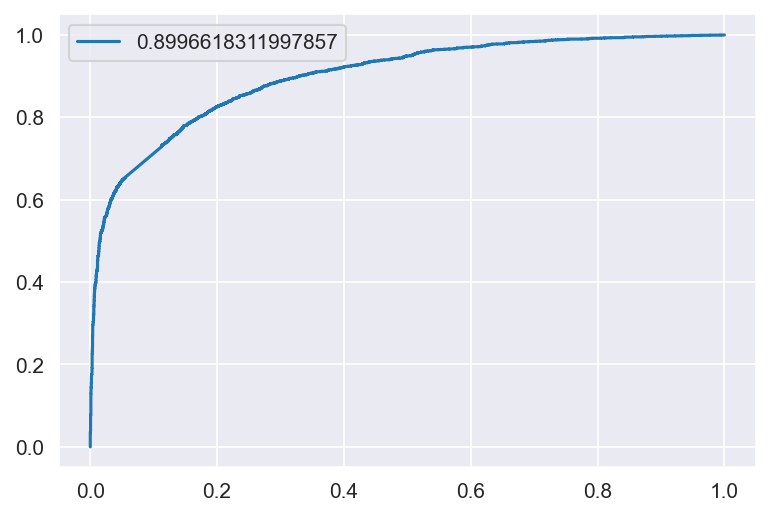

In [19]:
import matplotlib.pyplot as plt
plt.plot(e[0],e[1], label = str(c))
plt.legend()